In [ ]:
import os
import gc
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

def temizle_bellek():
    if K:
        K.clear_session()
    gc.collect()

temizle_bellek()


train_dir = "/content/drive/MyDrive/dataset/ham10000_gorseller_bolunmus/train"
test_dir = "/content/drive/MyDrive/dataset/ham10000_gorseller_bolunmus/test"
categories = ["kanser", "kanser_degil"]
image_size = (180, 180)

def veri_yukle(klasor, categories, image_size):
    X, y = [], []
    for category in categories:
        path = os.path.join(klasor, category)
        label = categories.index(category)
        for fname in os.listdir(path):
            try:
                img = cv2.imread(os.path.join(path, fname))
                if img is not None:
                    img = cv2.resize(img, image_size)
                    img = img / 255.0
                    X.append(img)
                    y.append(label)
            except Exception as e:
                print(e)
    return np.array(X), np.array(y)

train_images, train_labels = veri_yukle(train_dir, categories, image_size)
test_images, test_labels = veri_yukle(test_dir, categories, image_size)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Class Weights: {0: np.float64(2.5626919140225177), 1: np.float64(0.6212008435677956)}
Epoch 1/20
1252/1252 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.6336 - loss: 7.8822 - val_accuracy: 0.6662 - val_loss: 0.6030
Epoch 2/20
1252/1252 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6980 - loss: 0.5643 - val_accuracy: 0.8244 - val_loss: 0.4021
Epoch 3/20
1252/1252 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7211 - loss: 0.5111 - val_accuracy: 0.7799 - val_loss: 0.5038
Epoch 4/20
1252/1252 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7496 - loss: 0.4791 - val_accuracy: 0.5259 - val_loss: 0.8473
Epoch 5/20
1252/1252 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7589 - loss: 0.4458 - val_accuracy: 0.8548 - val_loss: 0.3034
Epoch 6/20
1252/1252 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7887 - loss: 0.4107 - val_accuracy: 0.9062 - val_loss: 0.2602
Epoch 7/20
1252/1252 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8134 - loss: 0.3639 - val_accuracy: 0.7490 - val_loss: 0.4959
Ep

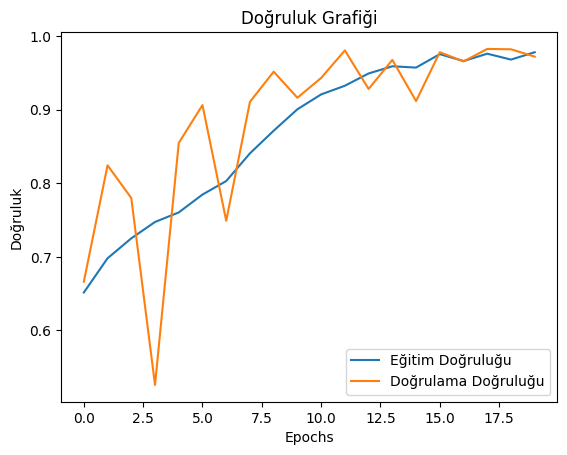

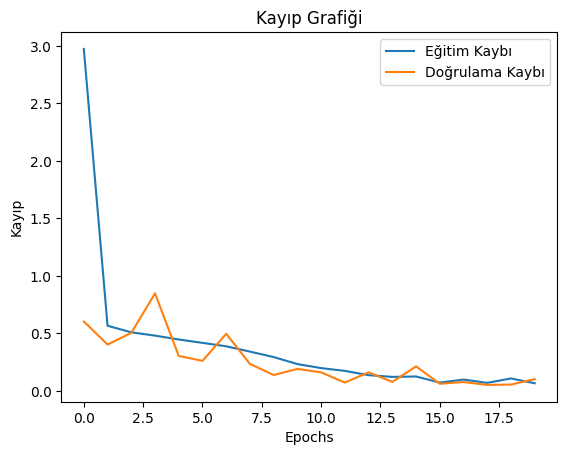

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step

📋 Sınıflandırma Raporu:
              precision    recall  f1-score   support

      kanser       0.88      0.99      0.93       391
kanser_degil       1.00      0.97      0.98      1613

    accuracy                           0.97      2004
   macro avg       0.94      0.98      0.96      2004
weighted avg       0.98      0.97      0.97      2004



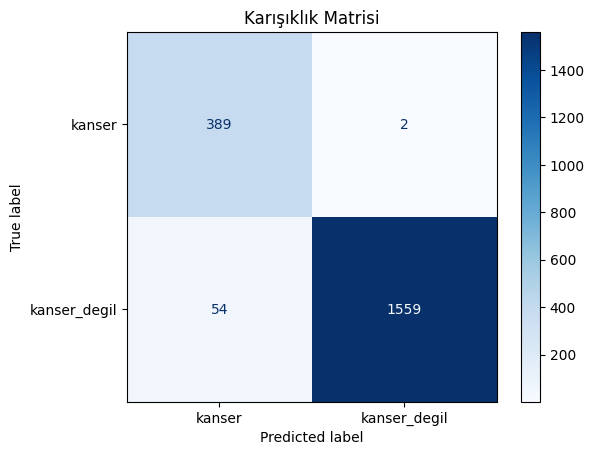

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


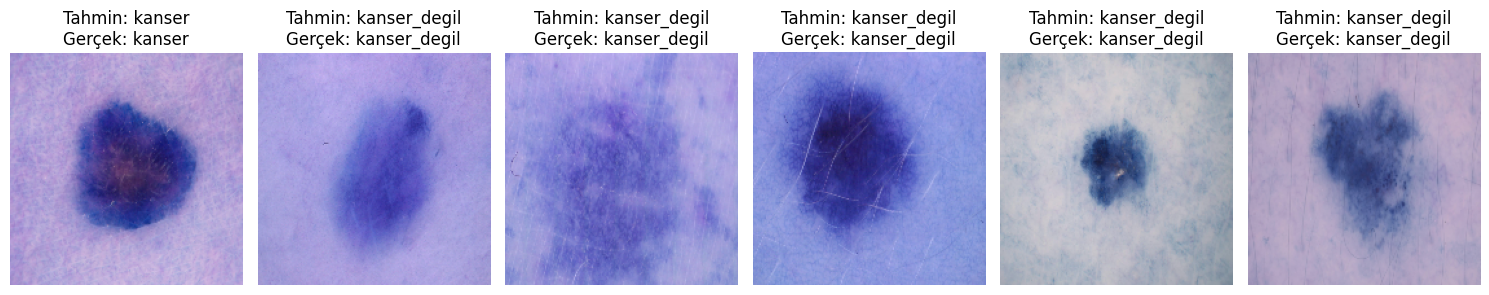

In [ ]:

model = Sequential([
    Conv2D(32, (3, 3), padding='same', input_shape=(180, 180, 3)),
    BatchNormalization(),
    LeakyReLU(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), padding='same'),
    BatchNormalization(),
    LeakyReLU(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), padding='same'),
    BatchNormalization(),
    LeakyReLU(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(256),
    Dropout(0.5),
    LeakyReLU(),

    Dense(2, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_labels),
    y=train_labels
)
class_weights_dict = dict(enumerate(class_weights))
print("Class Weights:", class_weights_dict)

history = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=8,
    validation_data=(test_images, test_labels),
    class_weight=class_weights_dict
)


plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epochs')
plt.ylabel('Doğruluk')
plt.title("Doğruluk Grafiği")
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epochs')
plt.ylabel('Kayıp')
plt.title("Kayıp Grafiği")
plt.legend()
plt.show()


predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)


print("\n📋 Sınıflandırma Raporu:")
print(classification_report(test_labels, predicted_labels, target_names=categories))


cm = confusion_matrix(test_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=categories)
disp.plot(cmap="Blues")
plt.title("Karışıklık Matrisi")
plt.show()


def tahmin_goster(n=5):
    indices = np.random.choice(len(test_images), n, replace=False)
    plt.figure(figsize=(15, 3))
    for i, idx in enumerate(indices):
        img = test_images[idx]
        prediction = model.predict(np.expand_dims(img, axis=0))
        label = categories[np.argmax(prediction)]
        true_label = categories[test_labels[idx]]

        plt.subplot(1, n, i + 1)
        plt.imshow(img)
        plt.title(f"Tahmin: {label}\nGerçek: {true_label}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

tahmin_goster(n=6)

model.save("/content/drive/MyDrive/Colab Notebooks/models/cilt_kanseri_2205_11.h5")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step

📊 Sınıflandırma Raporu (Eğitim Verisi):
              precision    recall  f1-score   support

      kanser       0.87      0.99      0.93      1954
kanser_degil       1.00      0.97      0.98      8061

    accuracy                           0.97     10015
   macro avg       0.94      0.98      0.95     10015
weighted avg       0.97      0.97      0.97     10015



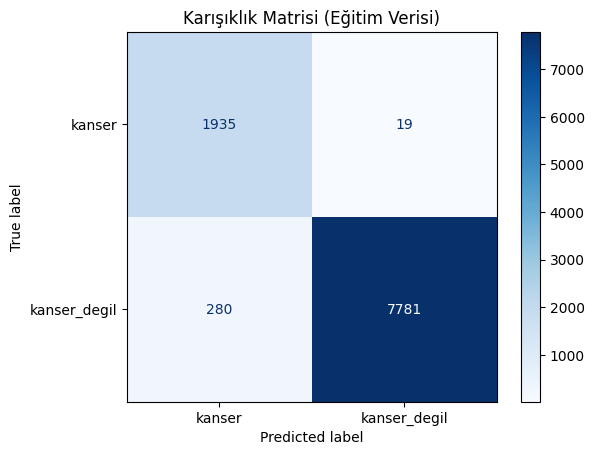

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

📊 Sınıflandırma Raporu (Test Verisi):
              precision    recall  f1-score   support

      kanser       0.88      0.99      0.93       391
kanser_degil       1.00      0.97      0.98      1613

    accuracy                           0.97      2004
   macro avg       0.94      0.98      0.96      2004
weighted avg       0.98      0.97      0.97      2004



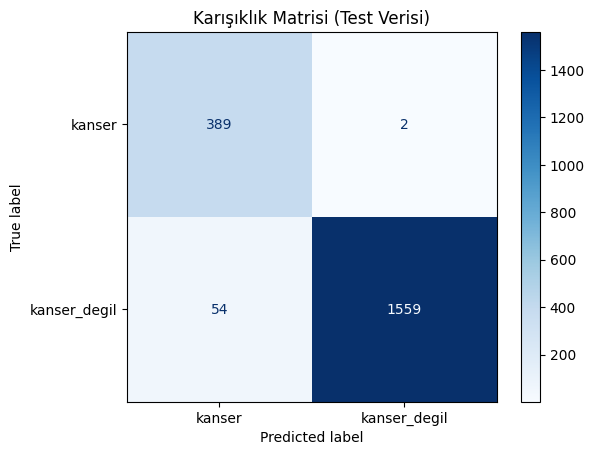

In [ ]:
def model_degerlendir(veri, etiket, veri_adi="Veri"):
    tahminler = model.predict(veri)
    y_pred = np.argmax(tahminler, axis=1)

    print(f"\n📊 Sınıflandırma Raporu ({veri_adi}):")
    print(classification_report(etiket, y_pred, target_names=categories))

    cm = confusion_matrix(etiket, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=categories)
    disp.plot(cmap='Blues')
    plt.title(f"Karışıklık Matrisi ({veri_adi})")
    plt.show()


model_degerlendir(train_images, train_labels, "Eğitim Verisi")


model_degerlendir(test_images, test_labels, "Test Verisi")
